### Analyze customer churn using different models

In [19]:
# import the libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

#import the libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [20]:
#load the file
df_churn=pd.read_csv("D:/01_Reva/PDGM/13_Marketing_and_Retail_Analytics/Customer_Churn.csv")
df_churn.info()
df_churn.shape
df_churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

(3333, 21)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [21]:
print("Counts of Labels")
df_churn.groupby("churn").size()

Counts of Labels


churn
False    2850
True      483
dtype: int64

In [22]:
#convert True and False to 1 and 0
le=preprocessing.LabelEncoder()

le.fit(df_churn["churn"])

list(le.classes_)

LabelEncoder()

[False, True]

In [23]:
dfn=le.transform(df_churn["churn"])

In [24]:
df_churn['Y']=dfn
df_churn.info()
df_churn.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'Y'],
      dtype='object')

In [25]:
#separate independent categorical variables to vonvert to numerical
x_catg=df_churn.loc[:,('international plan','voice mail plan')]
x_catg.head()
x_catg.shape

,international plan,voice mail plan
0,no,yes
1,no,yes
2,no,no
3,yes,no
4,yes,no


(3333, 2)

In [26]:
#convert categorical var to dummy coding
x_num1=pd.get_dummies(x_catg)
x_num1.head()
df_churn.columns

,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,1,0,0,1
1,1,0,0,1
2,1,0,1,0
3,0,1,1,0
4,0,1,1,0


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'Y'],
      dtype='object')

In [27]:
#Separate independent numerical varialbles
x_num=df_churn.loc[:,('number vmail messages',
                       'total day minutes','total day calls','total day charge','total eve minutes',
                       'total eve calls','total eve charge',
                       'total night minutes','total night calls','total night charge',
                       'total intl minutes','total intl calls','total intl charge','customer service calls')]

x_num.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [28]:
#get all X's together
x = pd.concat([x_num1, x_num], axis=1)
x.head()

,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,1,0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,0,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,1,0,1,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,1,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [29]:
#create dependent variable
y = df_churn['Y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Y, dtype: int64

In [30]:
#create train and test data 75% and 25% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(2499, 18)

(834, 18)

(2499,)

(834,)

pandas.core.frame.DataFrame

In [31]:
train_x.isnull().sum()

international plan_no     0
international plan_yes    0
voice mail plan_no        0
voice mail plan_yes       0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

In [32]:
#build logistic regression model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

log.fit(train_x, train_y)
log.coef_

#find out key predictor of churn
coeff = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))], axis=1)
coeff.columns = ("Variable", "Coeff")
coeff.sort_values("Variable", ascending = True)

C:\Users\ashus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

array([[-2.77669281e-01,  2.27423067e-01, -3.16250946e-02,
        -1.86211192e-02, -3.10091884e-02,  9.07309942e-03,
        -1.13456397e-02,  1.61058348e-03,  1.72808551e-03,
        -1.17937489e-02,  1.38298058e-04, -1.37304150e-03,
        -1.18609040e-02, -7.01500467e-05, -2.30576200e-03,
        -1.37925944e-01, -6.33820454e-04,  5.30463217e-01]])

,Variable,Coeff
17,customer service calls,0.530463
0,international plan_no,-0.277669
1,international plan_yes,0.227423
4,number vmail messages,-0.031009
6,total day calls,-0.011346
7,total day charge,0.001611
5,total day minutes,0.009073
9,total eve calls,-0.011794
10,total eve charge,0.000138
8,total eve minutes,0.001728


In [33]:
#Generate Model Diagnostics
classes = log.predict(test_x)
print(classes.size)

834


In [34]:
#precision and recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y, classes))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y, classes))
print('AUC')
auc = metrics.roc_auc_score(test_y, classes)
auc

Accuracy Score
0.8501199040767387
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       712
           1       0.43      0.08      0.14       122

    accuracy                           0.85       834
   macro avg       0.65      0.53      0.53       834
weighted avg       0.80      0.85      0.80       834

AUC


0.531854393074231

confusion metrics


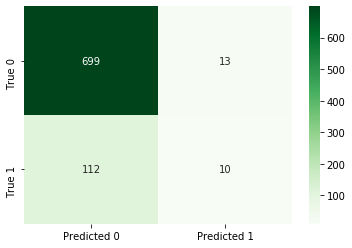

In [35]:
#confusion metrix
print("confusion metrics")
cf = metrics.confusion_matrix(test_y, classes)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot = True, cmap = "Greens", fmt = "d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

### Try Naive Bayes

In [36]:
from sklearn import naive_bayes

#Train NB classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(train_x,train_y)
y_pred=gnb.predict(test_x)

#Precision and Recall
print('Accuracy Score')
print(metrics.accuracy_score(test_y,y_pred))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y,y_pred))
print('AUC')
auc=metrics.roc_auc_score(test_y,y_pred)
auc

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy Score
0.8501199040767387
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       712
           1       0.49      0.46      0.47       122

    accuracy                           0.85       834
   macro avg       0.70      0.69      0.69       834
weighted avg       0.85      0.85      0.85       834

AUC


0.6880756124516487

### Try Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(train_x,train_y)
y_pred=clf.predict(test_x)

#Precision and Recall
print('Accuracy Score')
print(metrics.accuracy_score(test_y,y_pred))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y,y_pred))
print('AUC')
auc=metrics.roc_auc_score(test_y,y_pred)
auc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy Score
0.9544364508393285
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       712
           1       0.92      0.75      0.83       122

    accuracy                           0.95       834
   macro avg       0.94      0.87      0.90       834
weighted avg       0.95      0.95      0.95       834

AUC


0.8714312027997788